In [1]:
# Import các thư viện cần thiết
import numpy as np          # Tính toán ma trận, vector
import pandas as pd         # Xử lý dữ liệu
import matplotlib.pyplot as plt  # Vẽ biểu đồ

## 1. Import thư viện cần thiết

In [2]:
np.random.seed(42)  # Cố định seed để kết quả lặp lại được 

## 2. Load và khám phá dữ liệu

In [3]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('data/data_1.csv')

In [4]:
# Xem 5 dòng đầu và kiểm tra missing values
df.head(), df.isna().sum()

(    x          y
 0  77  79.775152
 1  21  23.177279
 2  22  25.609262
 3  20  17.857388
 4  36  41.849864,
 x    0
 y    0
 dtype: int64)

In [5]:
# Import thêm các tool từ sklearn để so sánh
from sklearn.linear_model import LinearRegression as SkLearnLN  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
# Chia dữ liệu thành train (80%) và test (20%)
X_train, X_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2)

## 3. Tiền xử lý dữ liệu

Chuẩn bị dữ liệu cho thuật toán:
- Chuyển pandas Series thành numpy array
- **Standardization**: Chuẩn hóa dữ liệu về mean=0, std=1
- Reshape dữ liệu để phù hợp với ma trận

In [7]:
X_train.head()

232    88
59     57
6      62
185     4
173    56
Name: x, dtype: int64

Text(0.5, 1.0, 'Scatter plot of x vs y (Training Data)')

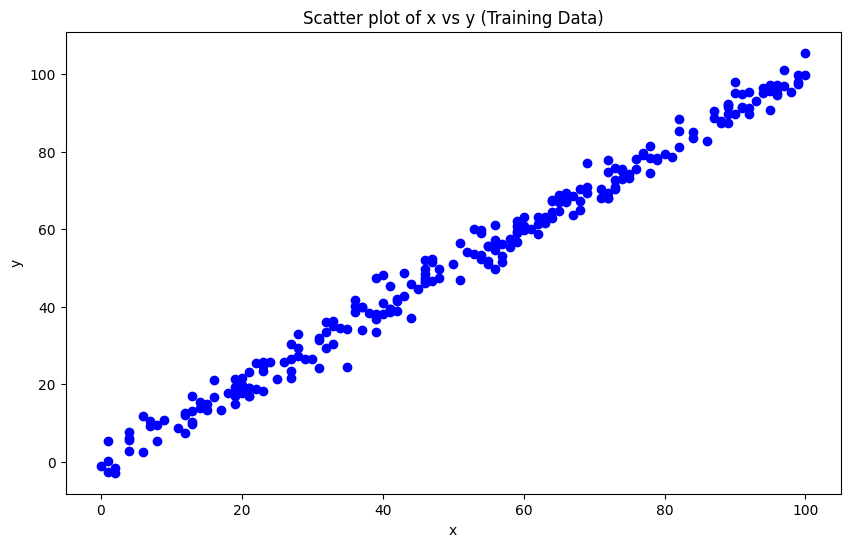

In [8]:
# Visualizing the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y (Training Data)')

In [9]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

- Chuẩn hóa dữ liệu

In [10]:
def standardize_data(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    X_train_std = (X_train - mean) / std
    X_test_std = (X_test - mean) / std
    
    return X_train_std, X_test_std

X_train, X_test = standardize_data(X_train, X_test)

In [11]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [12]:
X_train, X_train.shape, y_train.shape

(array([[ 1.32872162],
        [ 0.21043103],
        [ 0.39080048],
        [-1.70148515],
        [ 0.17435714],
        [ 1.72553441],
        [ 1.36479551],
        [ 1.36479551],
        [-0.438899  ],
        [ 0.10220936],
        [ 1.36479551],
        [ 0.96798272],
        [-0.51104678],
        [ 1.43694329],
        [-0.7996379 ],
        [ 0.46294826],
        [ 0.17435714],
        [-0.40282511],
        [-0.36675122],
        [-0.29460344],
        [-1.26859847],
        [ 0.42687437],
        [ 0.64331771],
        [-0.36675122],
        [ 1.18442606],
        [ 0.53509604],
        [-1.37682014],
        [ 1.00405661],
        [-1.30467236],
        [-1.70148515],
        [ 0.35472659],
        [ 1.11227828],
        [ 0.13828325],
        [ 1.61731274],
        [ 0.64331771],
        [ 0.49902215],
        [ 0.75153938],
        [ 0.3186527 ],
        [ 0.24650492],
        [-0.04208621],
        [-1.34074625],
        [-1.37682014],
        [-0.72749012],
        [ 1

## 4. Xây dựng Linear Regression từ scratch

### Thuật toán Gradient Descent:

1. **Forward Pass**: `y_pred = X · W + b`
2. **Cost Function**: `J = (1/2m) × Σ(y_pred - y_true)²`  
3. **Backward Pass** (tính gradient):
   - `dW = (1/m) × (y_pred - y_true) · X`
   - `db = (1/m) × Σ(y_pred - y_true)`
4. **Update Parameters**:
   - `W = W - α × dW`
   - `b = b - α × db`

Trong đó:
- `α` = learning rate (tốc độ học)
- `m` = số lượng samples

In [13]:
class LinearRegression:
    def __init__ (self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate  # Tốc độ học (α)
        self.iterations = iterations        # Số lần lặp
        self.W = None                      # Trọng số (weight)
        self.b = None                      # Bias (hệ số tự do)
        
    def initialize(self, n_features):
        """Khởi tạo trọng số và bias ngẫu nhiên"""
        self.W = np.random.randn(n_features) * 0.01  # Trọng số nhỏ
        self.b = 0                                   # Bias = 0
        print(f'Initialized weights: {self.W}, bias: {self.b}')

    def forward(self, X):
        """Forward pass: y_pred = X * W + b"""
        return np.dot(X, self.W) + self.b
    
    def compute_cost(self, y, y_pred):
        """Tính cost function: MSE = (1/2m) * Σ(y_pred - y)²"""
        n_samples = len(y_pred)
        cost = (1/(2*n_samples)) * np.sum((y_pred - y)**2)
        return cost 
    
    def backward(self, X, y, y_pred):
        """Backward pass: tính gradient để update parameters"""
        n_samples = len(y_pred)
        # Gradient của W: dW = (1/m) * (y_pred - y) · X  
        dW = (1/n_samples) * np.dot(y_pred - y, X)  
        # Gradient của b: db = (1/m) * Σ(y_pred - y)
        db = (1/n_samples) * np.sum(y_pred - y)
        return dW, db
    
    def fit(self, X, y):
        """Training model với gradient descent"""
        self.initialize(X.shape[1])  # Khởi tạo parameters
        costs = []                   # Lưu cost qua các iteration
        
        for i in range(self.iterations):
            # 1. Forward pass
            y_pred = self.forward(X)
            
            # 2. Tính cost
            cost = self.compute_cost(y, y_pred)
            costs.append(cost)
            
            # 3. Backward pass (tính gradient)
            dW, db = self.backward(X, y, y_pred)
            
            # 4. Update parameters
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            
            # In cost mỗi 100 iterations
            if i % 100 == 0:
                print(f'Iteration {i}, Cost: {cost}')

        # Vẽ biểu đồ cost giảm dần
        plt.plot(range(self.iterations), costs, label='Cost')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Training Cost over Iterations')
        plt.grid(True)
        plt.legend()
        plt.show()

    def predict(self, X):
        """Dự đoán với dữ liệu mới"""
        return self.forward(X)

## 5. Training Model

Initialized weights: [0.01209382], bias: 0
Iteration 0, Cost: 1724.7785909565782
Iteration 100, Cost: 235.04528355659897
Iteration 200, Cost: 35.45129940607353
Iteration 300, Cost: 8.709762305980878
Iteration 400, Cost: 5.126939860108268
Iteration 500, Cost: 4.646914473736461
Iteration 600, Cost: 4.582600828546803
Iteration 700, Cost: 4.573984107275358
Iteration 800, Cost: 4.57282964176107
Iteration 900, Cost: 4.572674966846832


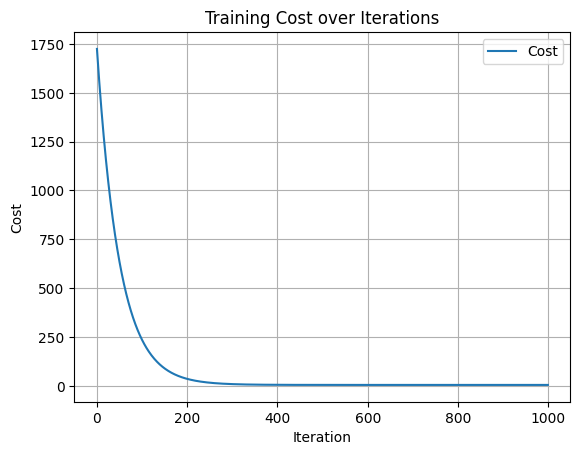

In [14]:
model = LinearRegression(learning_rate=0.01, iterations=1000)

model.fit(X_train, y_train)

In [15]:
print(f'Final weights: {model.W}, bias: {model.b}')

Final weights: [28.09375257], bias: 51.49306044705615


## 6. Visualization - Vẽ kết quả

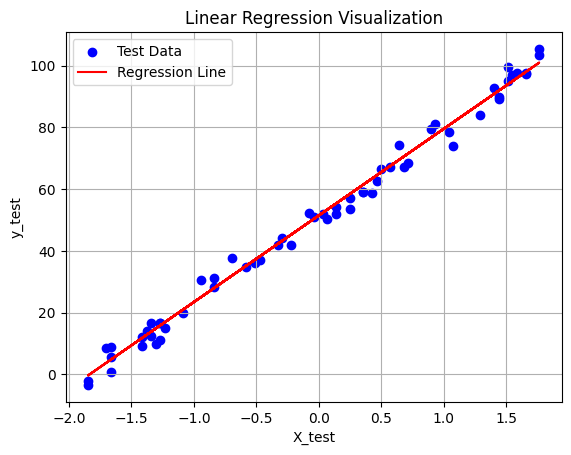

In [16]:
# 1. Plot dữ liệu test
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# 2. Dự đoán theo mô hình tuyến tính: y_pred = X * W + b
y_pred_line = X_test.dot(model.W) + model.b

# 3. Vẽ đường hồi quy
plt.plot(X_test, y_pred_line, color='red', label='Regression Line')

# 4. Trang trí
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("Linear Regression Visualization")
plt.legend()
plt.grid(True)
plt.show()

## 7. Đánh giá Model

**Mean Squared Error (MSE)**: Trung bình bình phương sai số
- Công thức: `MSE = (1/m) × Σ(y_pred - y_true)²`
- MSE càng nhỏ càng tốt

In [17]:
# Evaluation our model 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.258451007237262


## 8. So sánh với Sklearn

Để kiểm tra xem model tự tạo có hoạt động đúng không, ta so sánh với sklearn:

In [18]:
sklearn_model = SkLearnLN()
sklearn_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Evaluation sklearn model 
sk_y_pred = sklearn_model.predict(X_test)
sk_mse = mean_squared_error(sk_y_pred, y_test)
print(f'Sklearn Mean Squared Error: {sk_mse}')

Sklearn Mean Squared Error: 9.259410978631756
